In [4]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
young = pd.read_csv('responses.csv')

## Estadisticas descriptivas

### - Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?

In [46]:
desc = young.describe()
desc = desc.append(young.mode()[:1].rename(index={0: 'mode'}))
desc

,Achievements,Action,Active sport,Adrenaline sports,Age,Ageing,Alcohol,Alternative,Animated,Appearence and gestures,...,Thriller,Unpopularity,Village - town,Waiting,War,Weight,Western,Workaholism,Writing,Writing notes
count,1008.000000,1008.000000,1006.000000,1007.000000,1003.000000,1009.000000,NaN,1003.000000,1007.000000,1007.000000,...,1009.000000,1007.000000,NaN,1007.000000,1008.000000,990.000000,1006.000000,1005.000000,1004.000000,1007.000000
mean,2.963294,3.536706,3.291252,2.948361,20.433699,2.580773,NaN,2.828514,3.788481,3.597815,...,3.383548,3.461768,NaN,2.672294,3.155754,66.405051,2.126243,2.996020,1.901394,3.083416
std,0.935689,1.236101,1.504111,1.420985,2.828840,1.386466,NaN,1.347173,1.219436,0.943806,...,1.197951,1.118380,NaN,1.002907,1.348266,13.839561,1.138633,1.277285,1.287736,1.408224
min,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,NaN,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,19.000000,1.000000,NaN,2.000000,3.000000,3.000000,...,3.000000,3.000000,NaN,2.000000,2.000000,55.000000,1.000000,2.000000,1.000000,2.000000
50%,3.000000,4.000000,3.000000,3.000000,20.000000,2.000000,NaN,3.000000,4.000000,4.000000,...,4.000000,3.000000,NaN,3.000000,3.000000,64.000000,2.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,5.000000,4.000000,22.000000,4.000000,NaN,4.000000,5.000000,4.000000,...,4.000000,4.000000,NaN,3.000000,4.000000,75.000000,3.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,30.000000,5.000000,NaN,5.000000,5.000000,5.000000,...,5.000000,5.000000,NaN,5.000000,5.000000,165.000000,5.000000,5.000000,5.000000,5.000000
mode,3.000000,5.000000,5.000000,3.000000,19.000000,1.000000,social drinker,3.000000,5.000000,4.000000,...,4.000000,3.000000,city,3.000000,3.000000,60.000000,1.000000,3.000000,1.000000,3.000000


In [47]:
age = desc['Age']
weight = desc['Weight']

### Age analysis

In [48]:
age

count    1003.000000
mean       20.433699
std         2.828840
min        15.000000
25%        19.000000
50%        20.000000
75%        22.000000
max        30.000000
mode       19.000000
Name: Age, dtype: float64

In [84]:
freq_table = young.groupby(by='Age', as_index=False).size().reset_index(name='freq')
freq_table

,Age,freq
0,15.0,11
1,16.0,29
2,17.0,53
3,18.0,123
4,19.0,210
5,20.0,194
6,21.0,127
7,22.0,84
8,23.0,47
9,24.0,28


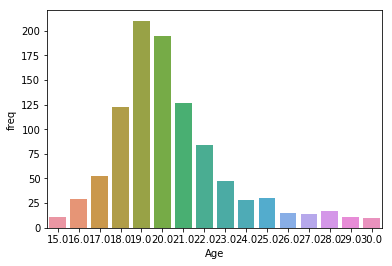

In [65]:
sns.barplot(x=freq_table.Age, y=freq_table.freq)

/home/adrian/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


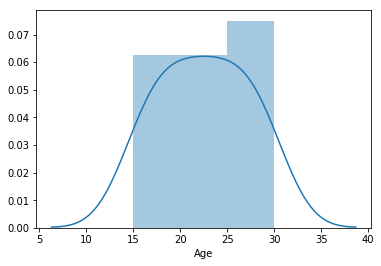

In [66]:
sns.distplot(a=freq_table.Age)

### Weight Analysis

In [49]:
weight

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
mode      60.000000
Name: Weight, dtype: float64

In [104]:
freq_weight_table = young.groupby(by='Weight', as_index=False).size().reset_index(name='freq')
#freq_weight_table

/home/adrian/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


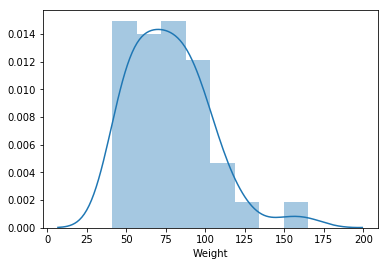

In [71]:
sns.distplot(a=freq_weight_table.Weight)

### - Realizar un análisis de outliers.

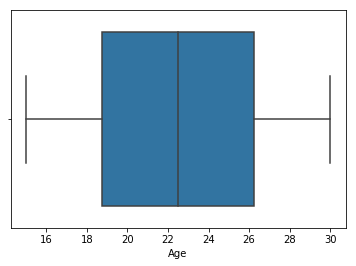

In [78]:
sns.boxplot(x=freq_table.Age)

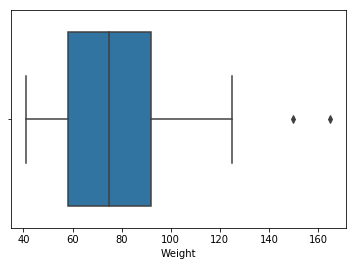

In [77]:
sns.boxplot(x=freq_weight_table.Weight)

### - Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.

In [131]:
young_female = young[young['Gender'] == 'female']
young_male = young[young['Gender'] == 'male']
young_male.shape, young_female.shape

((411, 150), (593, 150))

In [85]:
young_male.describe()['Age']

count    409.000000
mean      20.872861
std        2.796789
min       15.000000
25%       19.000000
50%       20.000000
75%       22.000000
max       30.000000
Name: Age, dtype: float64

In [91]:
young_female.describe()['Age']

count    589.000000
mean      20.113752
std        2.792537
min       15.000000
25%       18.000000
50%       20.000000
75%       21.000000
max       30.000000
Name: Age, dtype: float64

In [105]:
young_male_age_fdp = young_male.groupby(by='Age', as_index=False).size().reset_index(name='freq')
#young_male_age_fdp

In [106]:
young_female_age_fdp = young_female.groupby(by='Age', as_index=False).size().reset_index(name='freq')
#young_female_age_fdp

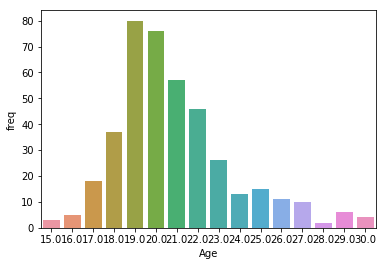

In [100]:
sns.barplot(x=young_male_age_fdp.Age, y=young_male_age_fdp.freq)

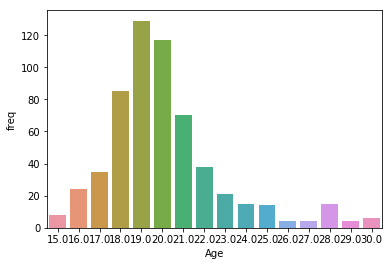

In [101]:
sns.barplot(x=young_female_age_fdp.Age, y=young_female_age_fdp.freq)

In [94]:
young_male.describe()['Weight']

count    405.000000
mean      77.088889
std       11.349838
min       53.000000
25%       70.000000
50%       77.000000
75%       83.000000
max      150.000000
Name: Weight, dtype: float64

In [95]:
young_female.describe()['Weight']

count    580.000000
mean      58.963793
std       10.005719
min       41.000000
25%       53.000000
50%       57.000000
75%       63.000000
max      165.000000
Name: Weight, dtype: float64

In [107]:
young_male_weight_fdp = young_male.groupby(by='Weight', as_index=False).size().reset_index(name='freq')
#young_male_weight_fdp

In [108]:
young_female_weight_fdp = young_female.groupby(by='Weight', as_index=False).size().reset_index(name='freq')
#young_female_weight_fdp

/home/adrian/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


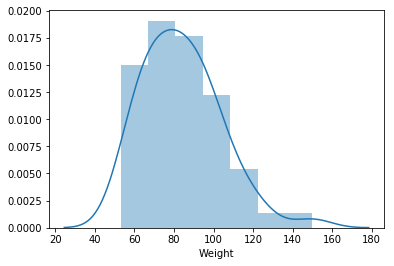

In [111]:
sns.distplot(a=young_male_weight_fdp.Weight)

/home/adrian/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


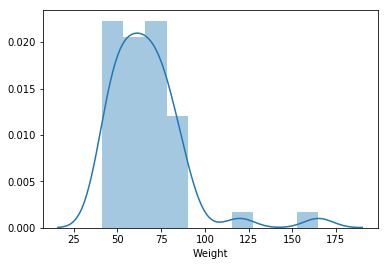

In [112]:
sns.distplot(a=young_female_weight_fdp.Weight)

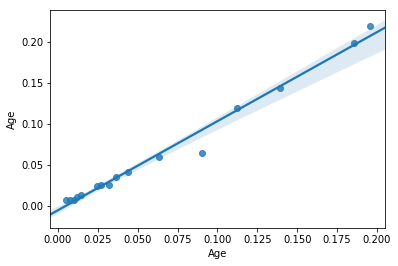

In [126]:
young_male_age_prob = young_male.Age.value_counts(normalize=True)
young_female_age_prob = young_female.Age.value_counts(normalize=True)
sns.regplot(x=young_male_age_prob, y=young_female_age_prob)

## Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

In [7]:
alcohol = young.groupby(by='Alcohol', as_index=False).size().reset_index(name='freq')
smoking = young.groupby(by='Smoking', as_index=False).size().reset_index(name='freq')

In [22]:
smoking['prob'] = smoking.freq.div(smoking.freq.sum()).reset_index(name='prob')['prob']
smoking

,Smoking,freq,prob
0,current smoker,189,0.188623
1,former smoker,175,0.174651
2,never smoked,208,0.207585
3,tried smoking,430,0.429142


In [23]:
alcohol['prob'] = alcohol.freq.div(alcohol.freq.sum()).reset_index(name='prob')['prob']
alcohol

,Alcohol,freq,prob
0,drink a lot,222,0.220896
1,never,124,0.123383
2,social drinker,659,0.655721


### Correlacion entre tabaquismo y alcoholismo

In [30]:
joint_p = pd.crosstab(young.Alcohol, young.Smoking, normalize=True)
joint_p

Smoking,current smoker,former smoker,never smoked,tried smoking
Alcohol,,,,
drink a lot,0.078,0.055,0.015,0.072
never,0.011,0.011,0.061,0.039
social drinker,0.099,0.109,0.131,0.319


### - Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

In [39]:
graph_aux = joint_p.stack().reset_index(name='prob')

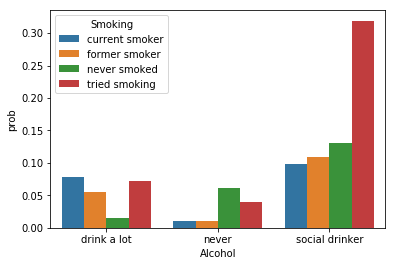

In [41]:
sns.barplot(x=graph_aux.Alcohol, y=graph_aux.prob, hue=graph_aux.Smoking)